## As a student I have compiled this notebook as a personal project for my EDA over the public SPAM message dataset.

### Primary reason for compiling this notebook was to get hands-on experience in working with textual data, visualizations and KMeans clustering algorithm over the public SPAM dataset.

**Following is the list of tasks covered in this notebook:**


---



1.Bar plot of total messages under ham and spam

2.Plot of top 10 frequent words in dataset

3.Print the text message with most words

4.Word cloud for unigrams with stop words

5.Word cloud for bigrams with stop words

6.Word cloud for trigrams with stop words

7.Word cloud for unigrams with stop words

8.Word cloud for bigrams without stop words

9.Word cloud for trigrams without stop words

10.Bar plot of inertia value for KMean over cluster in range 1 to 19

11.Topic Modelling using LDA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df = pd.read_csv("./spam.csv")
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)
df.rename({'v1':'Label','v2':'Message'},inplace=True,axis=1)
sns.set_context('paper')

**1.Bar plot of total messages under ham and spam**


---

This plot gives us insight into the distribution of messages for a given category

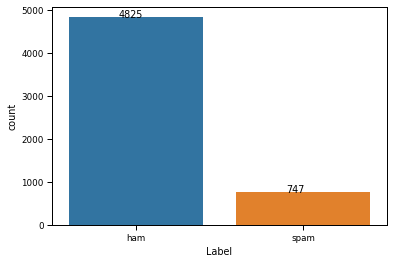

In [0]:
#sample counts for ham and spam
plotbar=sns.countplot(x=df.Label,data=df)
for i in plotbar.patches:
  plotbar.text(x=i.get_x()+0.3,y=i.get_height()+0.5,s=i.get_height())

**2. Plot of top 10 frequent words in dataset**


---

The plot below gives us the frequency distribution of top 10 words over all the messages


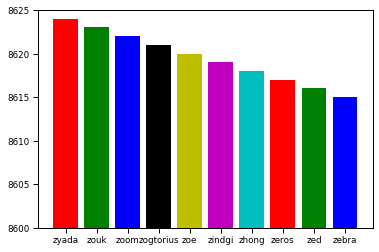

In [0]:
#distribution of top 10 frequent words in dataset
from sklearn.feature_extraction.text import TfidfVectorizer
textValues = df.Message.values
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(textValues)
vocabDict = vectorizer.vocabulary_
vocabDf = pd.DataFrame.from_dict(vocabDict,orient='index',columns=['Frequency'])
vocabDf.sort_values(by=['Frequency'],inplace=True,ascending=False)
plt.ylim(8600,8625)
my_colors = 'rgbkymcrgb'
plotbar1 = plt.bar(x=vocabDf.index[:10],height=vocabDf.Frequency[:10],color=my_colors)
plt.rc('axes', labelsize=10)
plt.show()

**3. Print the text message with most words**

---


In [0]:
#Largest message in the dataset
maxlen = 0
indexFlag=0
sentenceList = df['Message'].values
for index,message in enumerate(sentenceList):
  if len(message) > maxlen:
    maxlen = len(message)
    indexFlag=index
sentenceList[indexFlag]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

**4.Word cloud for unigrams with stop words**

---
The given wordcloud gives us insight into most frequent unigrams. The size of the word corresponds to its frequency.

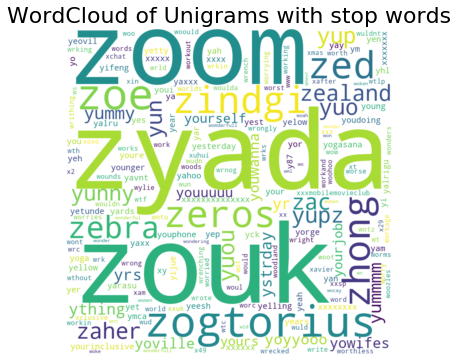

In [0]:
#Wordcloud of unigram before removimg stop words
vectorize_unigram = TfidfVectorizer(ngram_range=(1,1))
vectorize_unigram.fit_transform(sentenceList)
unigramDict = vectorize_unigram.vocabulary_
  
wordcloudUnigram = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,max_words=200,mode="RGBA").generate_from_frequencies(unigramDict)
plt.figure(figsize=(8,6))
plt.imshow(wordcloudUnigram,interpolation="bilinear")
plt.title("WordCloud of Unigrams with stop words",fontdict={'fontsize':22})
plt.axis('off')
plt.show()

**5.Word cloud for bigrams with stop words**

---
The given wordcloud gives us insight into most frequent bigrams. The size of the word corresponds to its frequency.

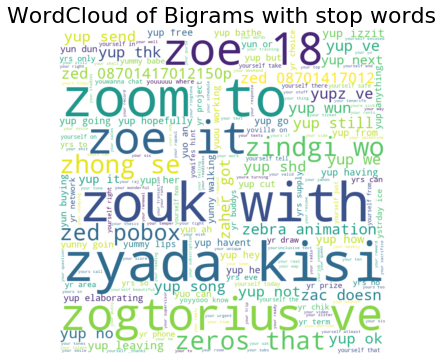

In [0]:
#wordcloud of bigram before removing stop words
vectorize_bigram = TfidfVectorizer(ngram_range=(2,2))
vectorize_bigram.fit_transform(sentenceList)
bigramDict = vectorize_bigram.vocabulary_
wordcloudBigram = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,max_words=200,mode="RGBA").generate_from_frequencies(bigramDict)
plt.figure(figsize=(8,6))
plt.imshow(wordcloudBigram,interpolation="bilinear")
plt.title("WordCloud of Bigrams with stop words",fontdict={'fontsize':22})
plt.axis('off')
plt.show()

**6.Word cloud for trigrams with stop words**

---
The given wordcloud gives us insight into most frequent trigrams. The size of the word corresponds to its frequency.

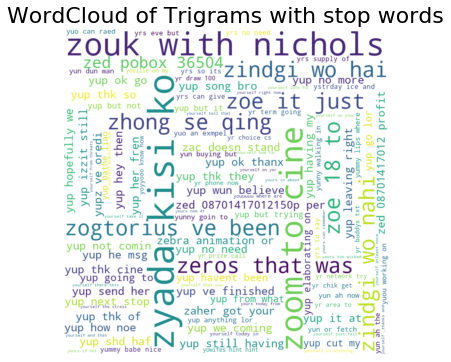

In [0]:
#wordcloud of trigram before removing stop words
vectorize_trigram = TfidfVectorizer(ngram_range=(3,3))
vectorize_trigram.fit_transform(sentenceList)
trigramDict = vectorize_trigram.vocabulary_
wordcloudTrigram = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,max_words=200,mode="RGBA").generate_from_frequencies(trigramDict)
plt.figure(figsize=(8,6))
plt.imshow(wordcloudTrigram,interpolation="bilinear")
plt.title("WordCloud of Trigrams with stop words",fontdict={'fontsize':22})
plt.axis('off')
plt.show()

**7.Word cloud for unigrams without stop words**

---
The given wordcloud gives us insight into most frequent unigrams. The size of the word corresponds to its frequency

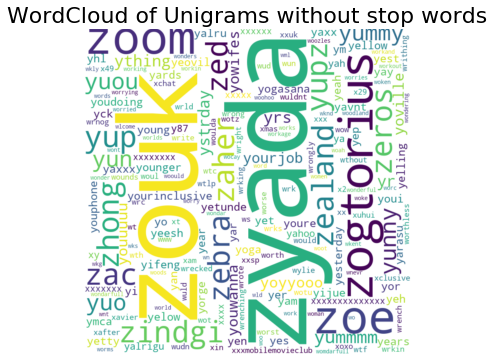

In [0]:
#word cloud for unigram after removing stop words
vectorize_unigram_stopWords = TfidfVectorizer(ngram_range=(1,1),stop_words = stopWords)
vectorize_unigram_stopWords.fit_transform(sentenceList)
unigramStopWordsDict = vectorize_unigram_stopWords.vocabulary_
  
wordcloudUnigram = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,max_words=200,mode="RGBA").generate_from_frequencies(unigramStopWordsDict)
plt.figure(figsize=(8,6))
plt.imshow(wordcloudUnigram,interpolation="bilinear")
plt.title("WordCloud of Unigrams without stop words",fontdict={'fontsize':22})
plt.axis('off')
plt.show()


**8.Word cloud for bigrams without stop words**

---
The given wordcloud gives us insight into most frequent bigrams. The size of the word corresponds to its frequency

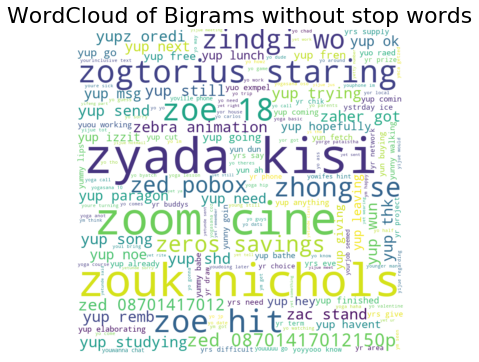

In [0]:
#wordcloud for bigram after removing stopwords
vectorize_bigram_stopwords = TfidfVectorizer(ngram_range=(2,2),stop_words=stopWords)
vectorize_bigram_stopwords.fit_transform(sentenceList)
bigramDictStopWords = vectorize_bigram_stopwords.vocabulary_
wordcloudBigram = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,max_words=200,mode="RGBA").generate_from_frequencies(bigramDictStopWords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloudBigram,interpolation="bilinear")
plt.title("WordCloud of Bigrams without stop words",fontdict={'fontsize':22})
plt.axis('off')
plt.show()

**9.Word cloud for trigrams without stop words**

---
The given wordcloud gives us insight into most frequent trigrams. The size of the word corresponds to its frequency

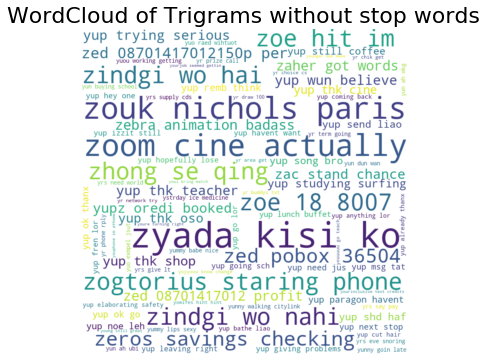

In [0]:
#wordcloud of trigram after removing stop words
vectorize_trigram_stopwords = TfidfVectorizer(ngram_range=(3,3),stop_words=stopWords)
vectorize_trigram_stopwords.fit_transform(sentenceList)
trigramDictStopWords = vectorize_trigram_stopwords.vocabulary_
wordcloudTrigram = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10,max_words=200,mode="RGBA").generate_from_frequencies(trigramDictStopWords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloudTrigram,interpolation="bilinear")
plt.title("WordCloud of Trigrams without stop words",fontdict={'fontsize':22})
plt.axis('off')
plt.show()

**10.Bar plot of inertia value for KMean over cluster in range 1 to 19**

---
KMeans clustering gives us insight into the existing groups within the messages. The best values is found at the point where the elbow joint can be observed.

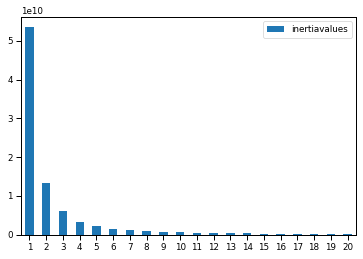

In [0]:
#Plotting inertia values of KMeans over cluster size 1 to 19
encoder = LabelEncoder()
encoder.fit(list(vectorize_unigram.vocabulary_.keys()))
encoder.transform(list(vectorize_unigram.vocabulary_.keys()))
X = encoder.transform(list(vectorize_unigram.vocabulary_.keys()))
X= X.reshape(-1,1)
kmeans = KMeans(n_clusters=2,random_state = 0).fit(X)
predictions = kmeans.predict(X)
predictionsList = []
inertiaDict = {}
for index,i in enumerate(range(1,21)):
  kmeans = KMeans(n_clusters=i,random_state = 0).fit(X)
  predictionsList.append(kmeans.predict(X))
  inertiaDict[index+1]=[kmeans.inertia_]
inertiaDf = pd.DataFrame.from_dict(inertiaDict,orient='index')
inertiaDf.rename({0:"inertiavalues"},axis=1,inplace=True)
inertiaDf.plot(kind="bar",rot=0)

11. Topic Modelling using LDA


---

Topic modelling on TF-IDF vectorize with Unigram

In [0]:
vectorize_topic = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
doc_term_matrix = vectorize_topic.fit_transform(sentenceList)
n_topics = 8
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_topic_matrix = lsa_model.fit_transform(doc_term_matrix)

In [0]:
def get_keys(topic_mstrix):
    keys = lsa_topic_matrix.argmax(axis=1).tolist()
    return keys

In [0]:
from collections import Counter
def keys_to_counts(keys):
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (categories,counts)

In [0]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories,lsa_counts = keys_to_counts(lsa_keys)

In [0]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [0]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, doc_term_matrix, vectorize_topic)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  ok ll yeah
Topic 2:  ll sorry later
Topic 3:  gt lt just
Topic 4:  thats min lt
Topic 5:  come home tomorrow
Topic 6:  lor going da
Topic 7:  good day love
Topic 8:  ur home free


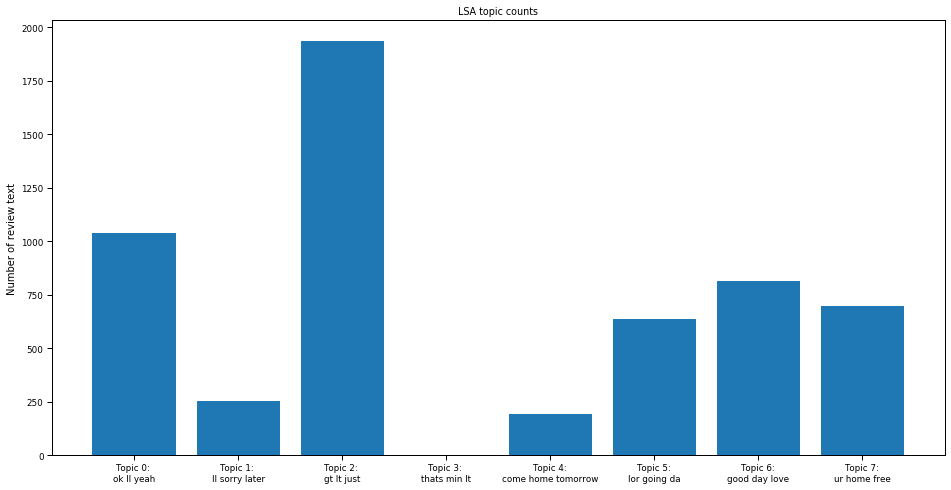

In [0]:
top_3_words = get_top_n_words(3, lsa_keys, doc_term_matrix, vectorize_topic)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();